In [ ]:
'''survival analysis is also called duration analysis, transition analysis, time to event analysis and failure time analysis
Censoring- incomplete observation of the time of event
'''

Right Censoring: This happens when the subject enters at t=0 i.e at the start of the study and terminates before the event of interest occurs. This can be either not experiencing the event of interest during the study, i.e they lived longer than the duration of the study, or could not be a part of the study completely and left early without experiencing the event of interest, i.e they left and we could not study them any longer.

Left Censoring: This happens when the birth event wasn’t observed. Another concept known as Length-Biased Sampling should also be mentioned here. This type of sampling occurs when the goal of the study is to perform analysis on the people/subjects who already experienced the event and we wish to see whether they will experience it again. The lifelines package has support for left-censored datasets by adding the keyword left_censoring=True.

Interval Censoring: This happens when the follow-up period, i.e time between observation, is not continuous. This can be weekly, monthly, quarterly, etc.
Left Truncation: It is referred to as late entry. The subjects may have experienced the event of interest before entering the study. There is an argument named ‘entry’ that specifies the duration between birth and entering the study.

Hazard Function
The Hazard Function also called the intensity function, is defined as the probability that the subject will experience an event of interest within a small time interval, provided that the individual has survived until the beginning of that interval. It is the instantaneous rate calculated over a time period and this rate is considered constant. It can also be considered as the risk of experiencing the event of interest at time t. It is the number of subjects experiencing an event in the interval beginning at time t divided by the product of the number of subjects surviving at time t and interval width

Kaplan-Meier Estimate
Kaplan-Meier Estimate is used to measure the fraction of subjects who survived for a certain amount of survival time t under the same circumstances. It is used to give an average view of the population. This method is also called the product limit. It allows a table called, life table, and a graph, called survival curve, to be produced for a better view of the population at risk. Survival Time is defined as the time starting from a predefined point to the occurrence of the event of interest. The Kaplan-Meier Survival Curve is the probability of surviving in a given length of time where time is considered in small intervals. For survival Analysis using Kaplan-Meier Estimate, there are three assumptions :
1)Subjects that are censored have the same survival prospects as those who continue to be followed.

2)Survival probability is the same all the subjects, irrespective of when they are recruited in the study.

3)The event of interest happens at the specified time. This is because the event can happen between two examinations. The estimated survival time can be more accurately measured if the examination happens frequently i.e if the time gap between examinations is very small.

#problem 2
ECG of different age groups of people has been recorded. The survival time in hours after the operation is given and the event type is denoted by 1 (if dead) and 0 (if alive). Perform survival analysis on the dataset given below and provide your insights in the documentation. 


Business problem - To identify the survival timing after the operation for different age groups.

constraints - to build a model using KaplanMeierFitter for the survival analysis by using ECG reports.

In [14]:
# pip install lifelines
# import lifelines

import pandas as pd
# Loading the the survival un-employment data
ecg = pd.read_excel("C:\\Users\\DELL\\Desktop\\Data Science\\Datasets_SA\\ECG_Surv.xlsx")
ecg.head()
ecg.describe()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
count,133.000000,133.000000,133.000000,133.000000,133.000000,117.000000,121.000000,128.000000,130.00000,129.000000,133.000000
mean,21.795338,0.383459,62.413534,0.187970,0.228534,12.164769,4.763157,14.438125,1.37800,0.786202,1.984962
std,15.885313,0.488067,9.335601,0.392165,0.135864,7.370159,0.810013,5.018566,0.45185,0.225661,0.590133
min,0.030000,0.000000,23.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,1.000000
25%,6.000000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,2.000000
50%,22.000000,0.000000,62.000000,0.000000,0.217000,11.000000,4.650000,14.000000,1.21600,0.786000,2.000000
75%,33.000000,1.000000,68.000000,0.000000,0.280000,16.100000,5.300000,16.500000,1.50750,0.857000,2.000000
max,57.000000,1.000000,86.000000,1.000000,0.840000,40.000000,6.780000,39.000000,3.00000,2.000000,3.000000


In [15]:
ecg["survival_time_hr"].describe()

count    133.000000
mean      21.795338
std       15.885313
min        0.030000
25%        6.000000
50%       22.000000
75%       33.000000
max       57.000000
Name: survival_time_hr, dtype: float64

In [16]:
# Spell is referring to time 
T = ecg.survival_time_hr

In [18]:
# Importing the KaplanMeierFitter model to fit the survival analysis
from lifelines import KaplanMeierFitter

In [19]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

In [20]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T, event_observed=ecg.alive)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 133 total observations, 82 right-censored observations>

<AxesSubplot:xlabel='timeline'>

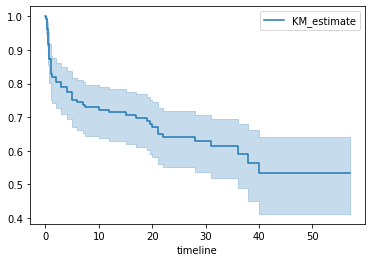

In [21]:
# Time-line estimations plot 
kmf.plot()


In [22]:
# Over Multiple groups 
# For each group, here group is ui
ecg.pericardialeffusion.value_counts()

0    108
1     25
Name: pericardialeffusion, dtype: int64

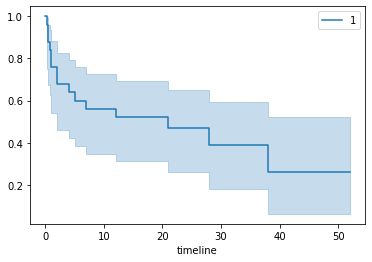

In [23]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[ecg.pericardialeffusion==1], ecg.alive[ecg.pericardialeffusion==1], label='1')
ax = kmf.plot()

In [24]:
# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[ecg.pericardialeffusion==0], ecg.alive[ecg.pericardialeffusion==0], label='0')
kmf.plot(ax=ax)

<AxesSubplot:xlabel='timeline'>